In [1]:
import threading
import math
import sys
import os

sys.path.append(os.path.abspath('..'))

In [2]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

import mule.local_control as m

In [3]:
from mule.low_control import MuleController
from mule.bridge import TCPMule

controller = MuleController()

mule = TCPMule(controller.update)

def update_function():
    for timestep, _ in enumerate(mule.run()):
        controller.update(mule)

t = threading.Thread(target=update_function)
t.start()

In [22]:
controller.desired_velocity = 0.5
controller.desired_phi = 10

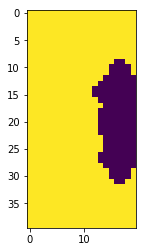

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/usr/local/Cellar/python/2.7.13/Frameworks/Python.framework/Versions/2.7/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/usr/local/Cellar/python/2.7.13/Frameworks/Python.framework/Versions/2.7/lib/python2.7/threading.py", line 754, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-3-e7e55945c72a>", line 9, in update_function
    for timestep, _ in enumerate(mule.run()):
  File "/Users/saad/Documents/Projects/ProjectMule/mule/mule/bridge.py", line 96, in run
    data = self.recv_bus_reqs()
  File "/Users/saad/Documents/Projects/ProjectMule/mule/mule/bridge.py", line 125, in recv_bus_reqs
    req = self.recv_bus_req()
  File "/Users/saad/Documents/Projects/ProjectMule/mule/mule/bridge.py", line 138, in recv_bus_req
    var = self.decode_bus_var(raw_var)
  File "/Users/saad/Documents/Projects/ProjectMule/mule/mule/bridge.py", line 167, in decode_bus_var

In [25]:
grid = m.local_grid(mule)

plt.imshow(grid)

In [6]:
mule.sensorData

{'collided': 0.0,
 'distance': 0.10125203430652618,
 'fl_rpm': -0.02128718511948511,
 'fl_torque': 0.26469152709355837,
 'fr_rpm': -0.05991781416525628,
 'fr_torque': -0.09424341194969621,
 'position_x': 23.999623074643385,
 'position_y': 0.13402985318137267,
 'position_z': 2.0085176069403095,
 'r_rpm': 0.07482994813013825,
 'r_torque': 0.4813703912420313,
 'rot_x': 359.9435040606711,
 'rot_y': 0.019646251218020522,
 'rot_z': -0.07954215952743468,
 'time': 8.119908332824707,
 'ultrasound_front1': 999.9987179402641,
 'ultrasound_front2': 1000.0164749148449,
 'ultrasound_front3': 999.9833639320833,
 'ultrasound_left1': 999.9822499201285,
 'ultrasound_left2': 1.6908737883227043,
 'ultrasound_rear1': 0.9373110087678072,
 'ultrasound_rear2': 0.9635025510754215,
 'ultrasound_rear3': 0.9319109285950493,
 'ultrasound_right1': 1000.0195475545067,
 'ultrasound_right2': 1.7021267284196326,
 'velocity_x': 0.00029579523977442575,
 'velocity_y': 0.004345347090502858,
 'velocity_z': 0.004192885204036

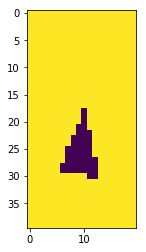

In [26]:
def ultrasound_grid(sx, sy, srot):
    srot = math.radians(90 + srot)

    grid = np.zeros((40, 20), dtype=bool)

    for y_index in range(0, 40):
        for x_index in range(0, 20):
            x = (x_index * 0.5) - 5
            y = (y_index * 0.5) - 10

            obstructed = m.ultrasound_obstructed(sx, sy, srot, 0, x, y)

            grid[y_index][x_index] = not obstructed

    return grid

grid = ultrasound_grid(0, -1.05, 180)

plt.imshow(grid)